<a href="https://colab.research.google.com/github/pawlenn/Proyek-Machine-Learning/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Fauren_Athira_Khanza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [43]:
home_df = pd.read_csv("Melbourne_housing_FULL.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [44]:
home_df.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
24983,Clifton Hill,54 Dwyer St,2,h,NaN,SP,Collins,21/10/2017,3.6,3068.0,...,1.0,NaN,281.0,99.0,1920.0,Yarra City Council,-37.78558,145.00222,Northern Metropolitan,2954.0
6951,Moonee Ponds,4/7 York St,1,u,336000.0,S,Brad,28/08/2016,6.9,3039.0,...,1.0,1.0,0.0,50.0,1980.0,Moonee Valley City Council,-37.76520,144.91160,Western Metropolitan,6232.0
9232,South Yarra,8/24 Fitzgerald St,2,u,623500.0,SP,hockingstuart,7/05/2016,3.3,3141.0,...,1.0,1.0,0.0,75.0,1970.0,Melbourne City Council,-37.84260,144.99300,Southern Metropolitan,14887.0
16574,Sunshine West,7 Arnold St,4,h,780000.0,S,Sweeney,24/06/2017,10.5,3020.0,...,2.0,2.0,696.0,199.0,1999.0,Brimbank City Council,-37.78647,144.81319,Western Metropolitan,6763.0
34238,Essendon West,24 Ruby St,4,h,1365000.0,S,Nelson,24/02/2018,7.5,3040.0,...,2.0,3.0,886.0,102.0,1950.0,Moonee Valley City Council,-37.75243,144.88566,Western Metropolitan,588.0
17495,Collingwood,9/108 Cambridge St,2,u,NaN,SN,Harrington,8/07/2017,2.0,3066.0,...,1.0,2.0,0.0,NaN,NaN,Yarra City Council,-37.80509,144.98565,Northern Metropolitan,4553.0
11014,Aberfeldie,19 Park Cr,3,h,NaN,S,Brad,23/04/2016,9.1,3040.0,...,NaN,NaN,NaN,NaN,NaN,Moonee Valley City Council,NaN,NaN,Western Metropolitan,1543.0
25647,Brighton East,2A Beenak Av,3,t,1500000.0,VB,Marshall,28/10/2017,10.3,3187.0,...,2.0,2.0,NaN,NaN,NaN,Bayside City Council,-37.92056,145.01657,Southern Metropolitan,6938.0
27225,Oak Park,8 Curie Av,2,h,1050000.0,VB,Nelson,11/11/2017,11.2,3046.0,...,1.0,1.0,NaN,NaN,NaN,Moreland City Council,-37.71600,144.92600,Northern Metropolitan,2651.0
5645,Kealba,10 Brazilia Av,4,h,431000.0,S,Brad,4/06/2016,15.0,3021.0,...,NaN,NaN,NaN,NaN,NaN,Brimbank City Council,NaN,NaN,Western Metropolitan,1202.0


In [45]:
print("\nInfo Dataset:")
print(home_df.info())


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  floa

In [46]:
print("\nStatistik Deskriptif:")
print(home_df.describe())


Statistik Deskriptif:
              Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000   
mean       1.624798      1.728845     593.598993     160.25640   1965.289885   
std        0.724212      

In [47]:
print("\nJumlah Data yang Hilang:")
print(home_df.isnull().sum())


Jumlah Data yang Hilang:
Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64


In [48]:
print("\nJumlah Data Duplikat:")
print(home_df.duplicated().sum())


Jumlah Data Duplikat:
1


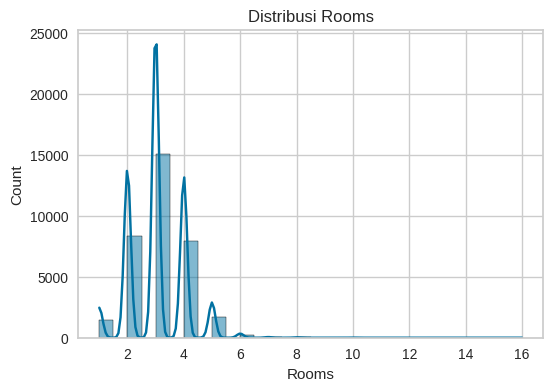

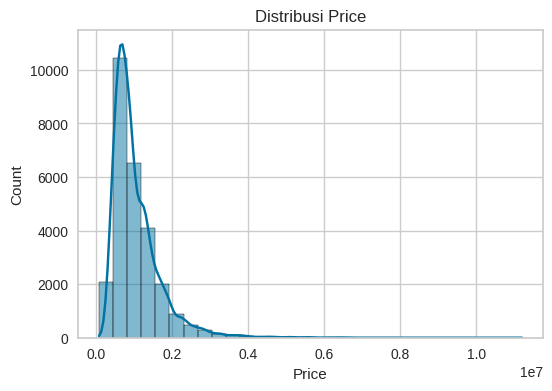

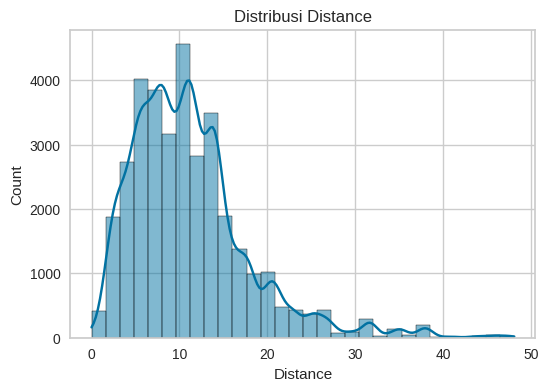

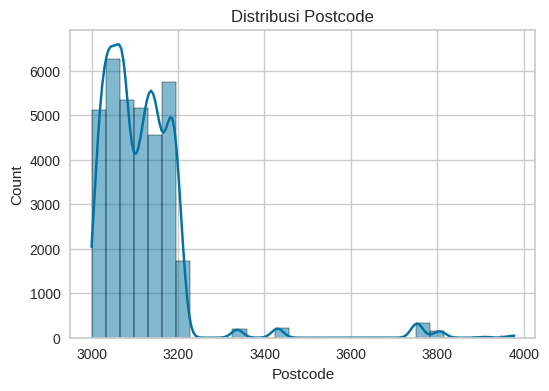

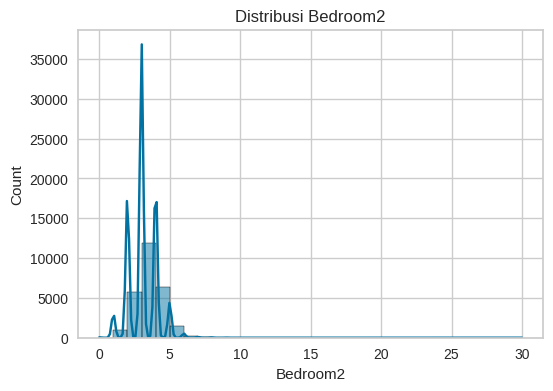

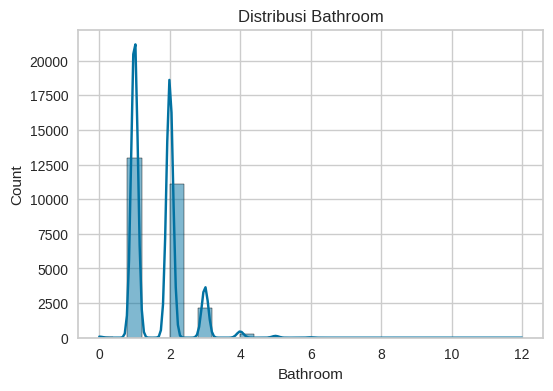

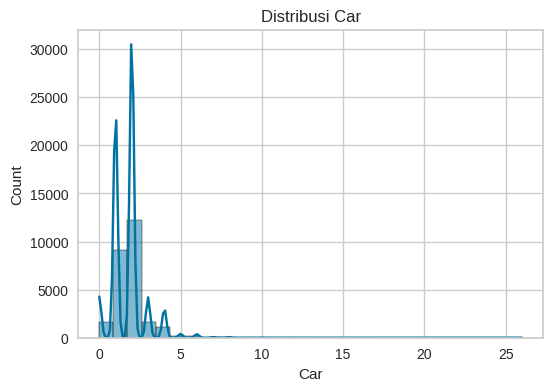

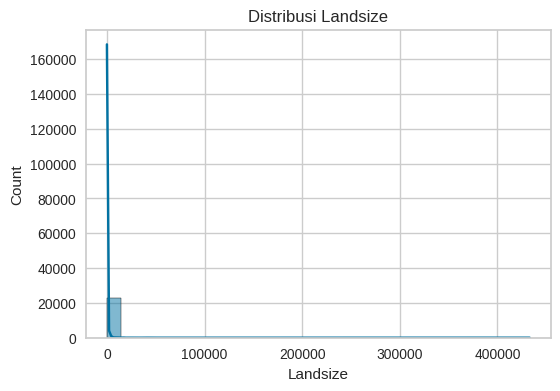

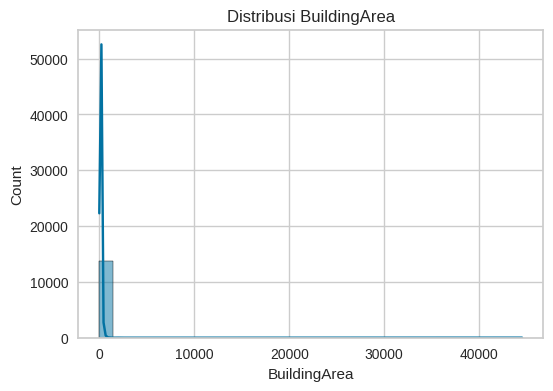

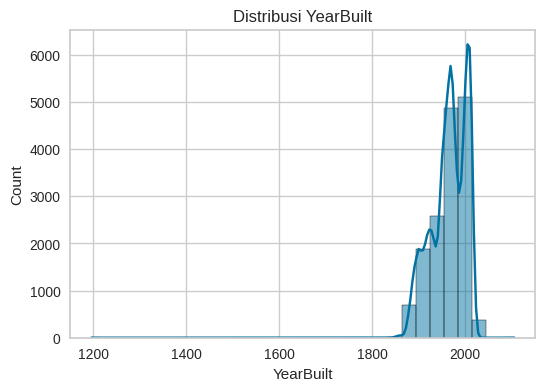

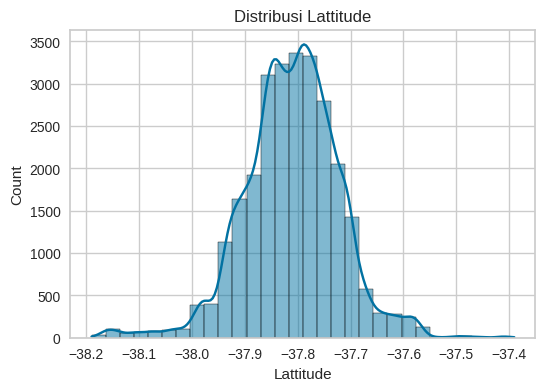

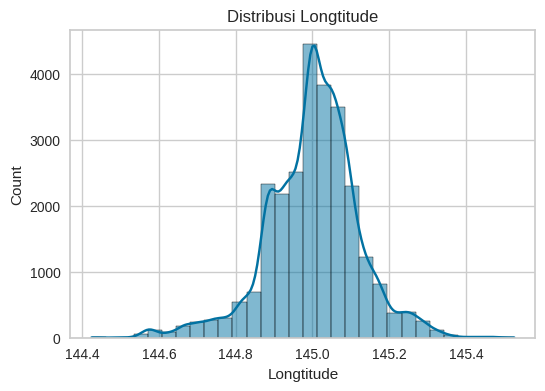

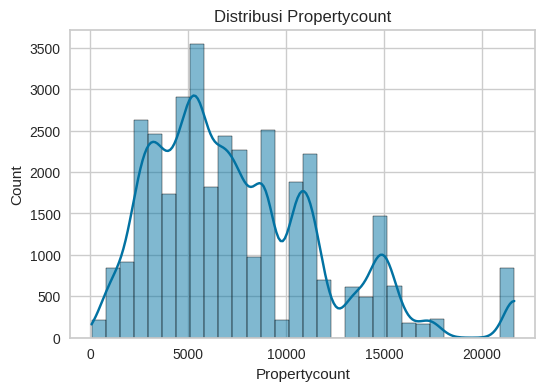

In [49]:
numerical_cols = ['Rooms','Price','Distance','Postcode','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Lattitude','Longtitude','Propertycount']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(home_df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.show()

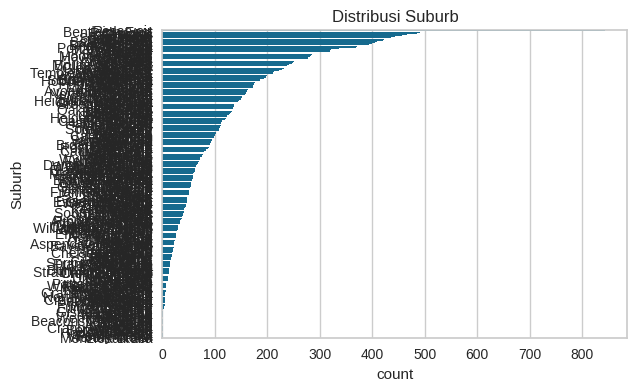

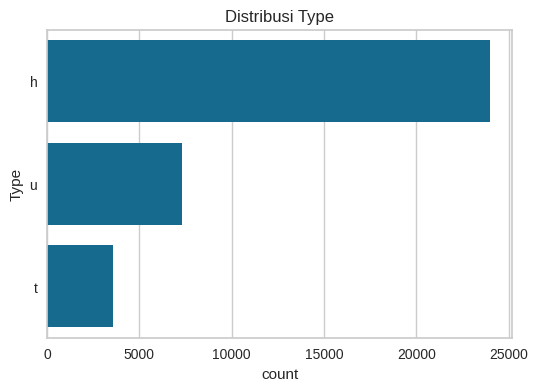

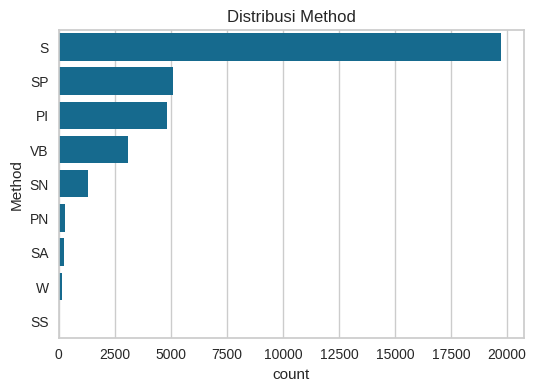

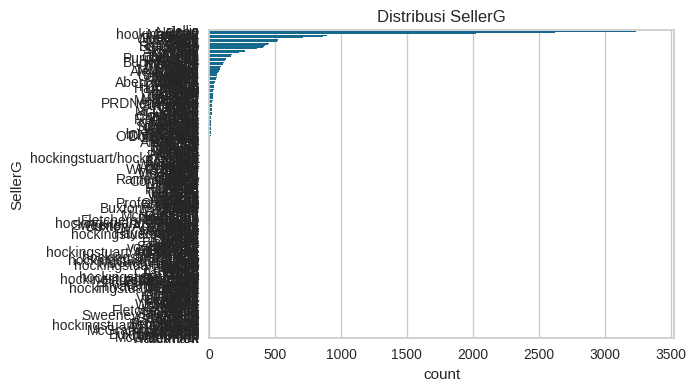

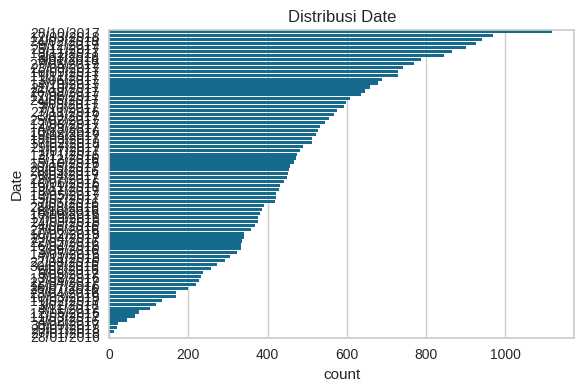

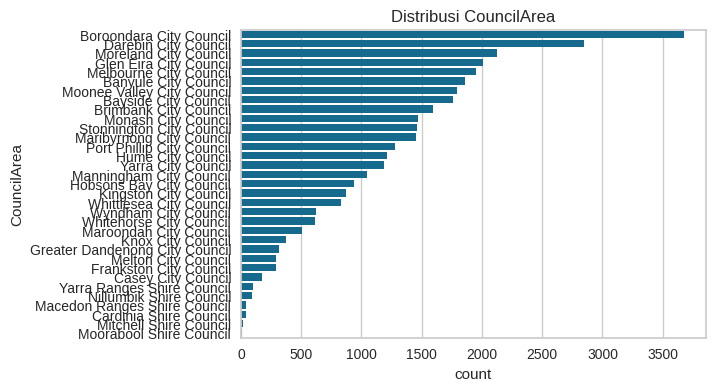

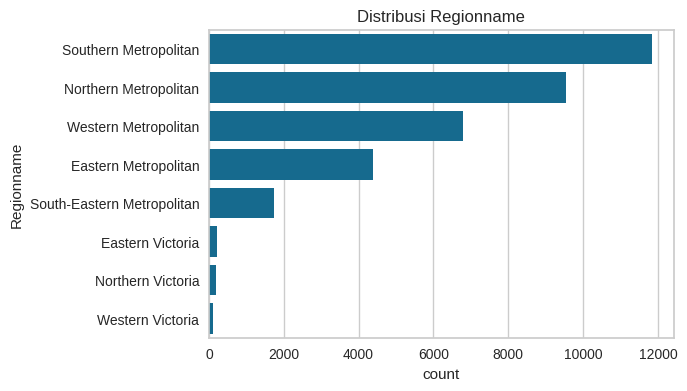

In [50]:
categorical_cols = ['Suburb', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea','Regionname']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(y=home_df[col], order=home_df[col].value_counts().index)
    plt.title(f'Distribusi {col}')
    plt.show()

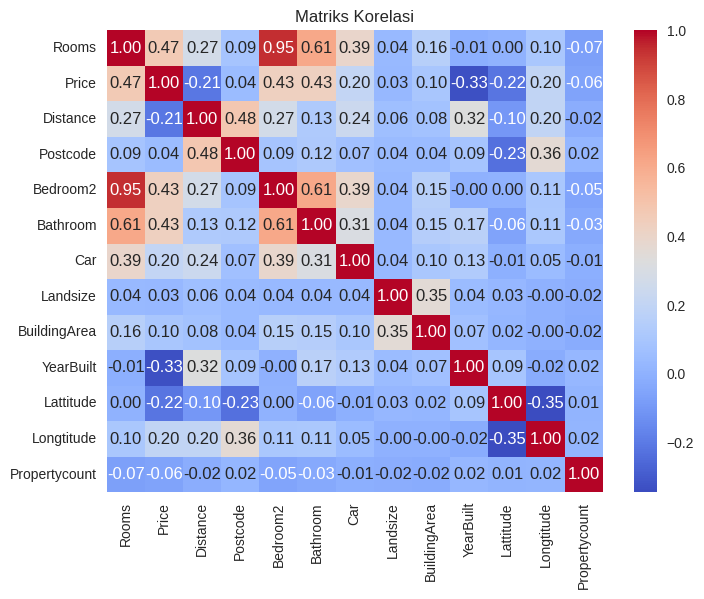

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(home_df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## Mengubah Floor menjadi 2 Fiture Numerik

In [52]:
home_df = home_df.dropna(subset=['Price', 'Bathroom', 'Car', 'Lattitude', 'Longtitude', 'Landsize','BuildingArea', 'YearBuilt'])
home_df = home_df.drop_duplicates()
home_df = home_df.drop_duplicates().reset_index(drop=True)

In [53]:
home_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8887 entries, 0 to 8886
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8887 non-null   object 
 1   Address        8887 non-null   object 
 2   Rooms          8887 non-null   int64  
 3   Type           8887 non-null   object 
 4   Price          8887 non-null   float64
 5   Method         8887 non-null   object 
 6   SellerG        8887 non-null   object 
 7   Date           8887 non-null   object 
 8   Distance       8887 non-null   float64
 9   Postcode       8887 non-null   float64
 10  Bedroom2       8887 non-null   float64
 11  Bathroom       8887 non-null   float64
 12  Car            8887 non-null   float64
 13  Landsize       8887 non-null   float64
 14  BuildingArea   8887 non-null   float64
 15  YearBuilt      8887 non-null   float64
 16  CouncilArea    8887 non-null   object 
 17  Lattitude      8887 non-null   float64
 18  Longtitu

In [54]:
print("\nInfo Dataset:")
print(home_df.info())


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8887 entries, 0 to 8886
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8887 non-null   object 
 1   Address        8887 non-null   object 
 2   Rooms          8887 non-null   int64  
 3   Type           8887 non-null   object 
 4   Price          8887 non-null   float64
 5   Method         8887 non-null   object 
 6   SellerG        8887 non-null   object 
 7   Date           8887 non-null   object 
 8   Distance       8887 non-null   float64
 9   Postcode       8887 non-null   float64
 10  Bedroom2       8887 non-null   float64
 11  Bathroom       8887 non-null   float64
 12  Car            8887 non-null   float64
 13  Landsize       8887 non-null   float64
 14  BuildingArea   8887 non-null   float64
 15  YearBuilt      8887 non-null   float64
 16  CouncilArea    8887 non-null   object 
 17  Lattitude      8887 non-null   float6

In [55]:
print("\nJumlah Data Duplikat:")
print(home_df.duplicated().sum())


Jumlah Data Duplikat:
0


In [56]:
print("\nStatistik Deskriptif:")
print(home_df.describe())


Statistik Deskriptif:
             Rooms         Price     Distance     Postcode     Bedroom2  \
count  8887.000000  8.887000e+03  8887.000000  8887.000000  8887.000000   
mean      3.098909  1.092902e+06    11.199887  3111.662653     3.078204   
std       0.963786  6.793819e+05     6.813402   112.614268     0.966269   
min       1.000000  1.310000e+05     0.000000  3000.000000     0.000000   
25%       2.000000  6.410000e+05     6.400000  3044.000000     2.000000   
50%       3.000000  9.000000e+05    10.200000  3084.000000     3.000000   
75%       4.000000  1.345000e+06    13.900000  3150.000000     4.000000   
max      12.000000  9.000000e+06    47.400000  3977.000000    12.000000   

          Bathroom          Car      Landsize  BuildingArea    YearBuilt  \
count  8887.000000  8887.000000   8887.000000   8887.000000  8887.000000   
mean      1.646450     1.692247    523.480365    149.309477  1965.753348   
std       0.721611     0.975464   1061.324228     87.925580    37.040876 

## Deteksi dan Penanganan Outlier

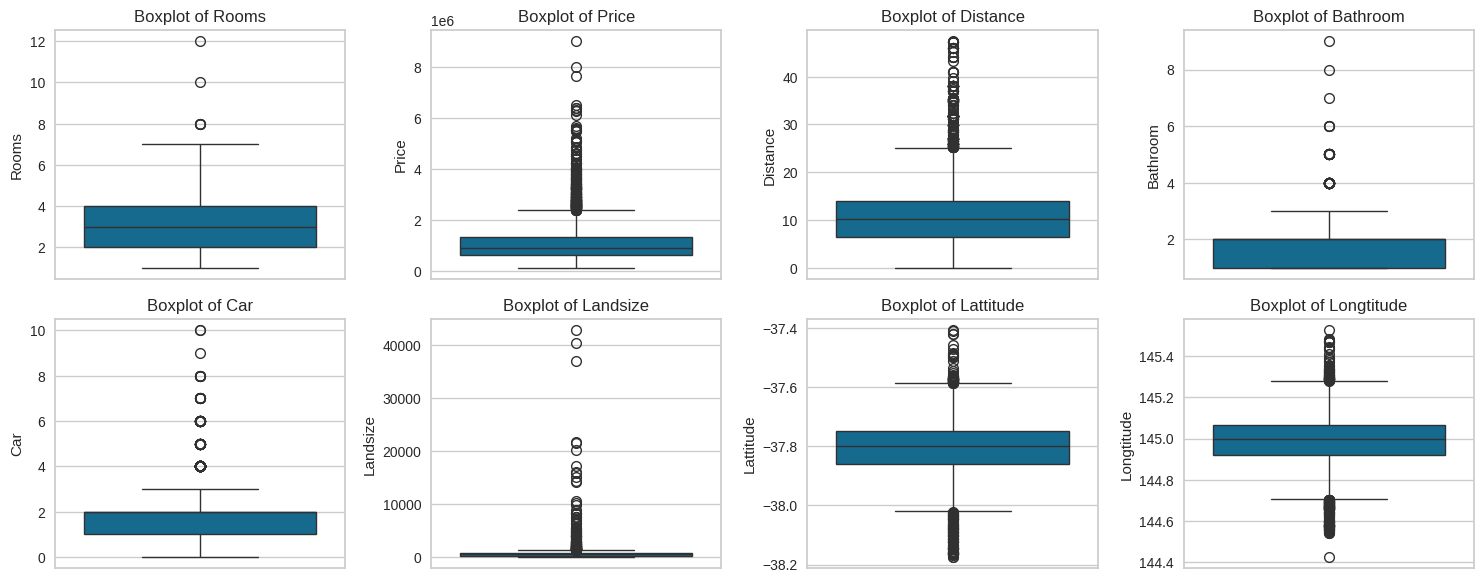

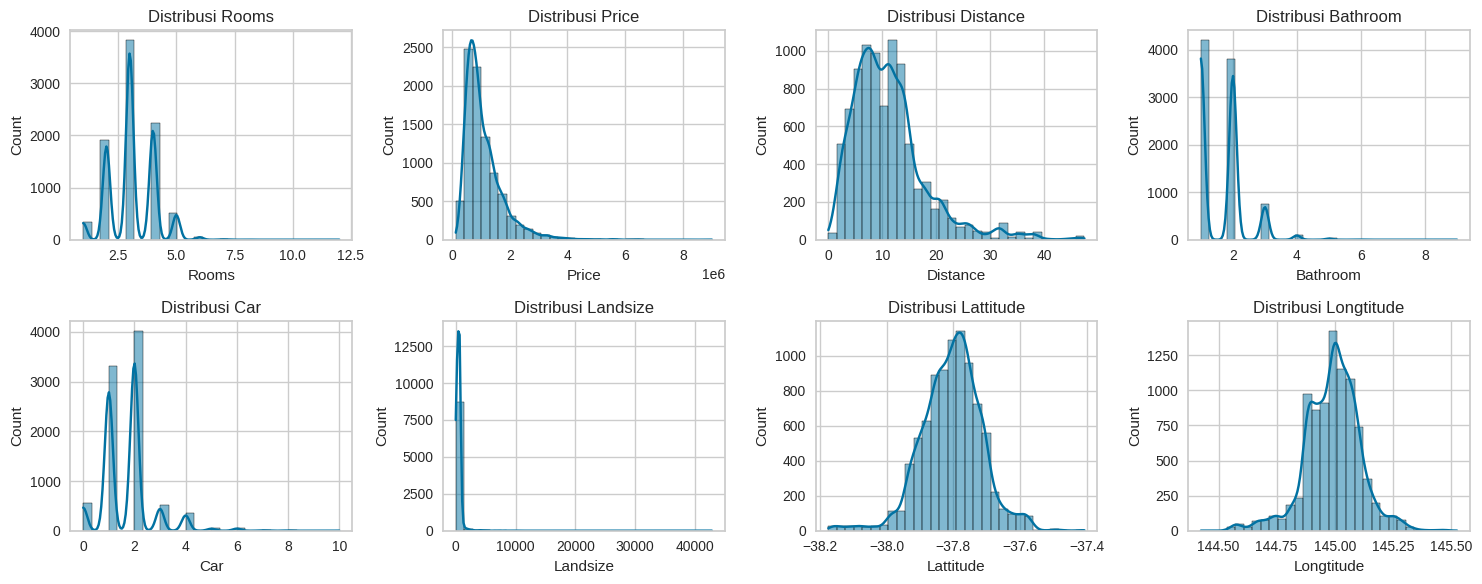

In [57]:
numerical_cols = ['Rooms','Price','Distance', 'Bathroom','Car','Landsize','Lattitude','Longtitude']
# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=home_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Histogram dengan KDE plot untuk melihat distribusi data
plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.histplot(home_df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

In [58]:
skewed_cols = ['Price','Distance','Bathroom','Car','Landsize']
home_df[skewed_cols] = home_df[skewed_cols].apply(lambda x: np.log1p(x))

# 6. Deteksi dan Penanganan Outlier dengan IQR
Q1 = home_df[numerical_cols].quantile(0.25)
Q3 = home_df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter data untuk menghapus outlier
home_df = home_df[~((home_df[numerical_cols] < (Q1 - 1.5 * IQR)) | (home_df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

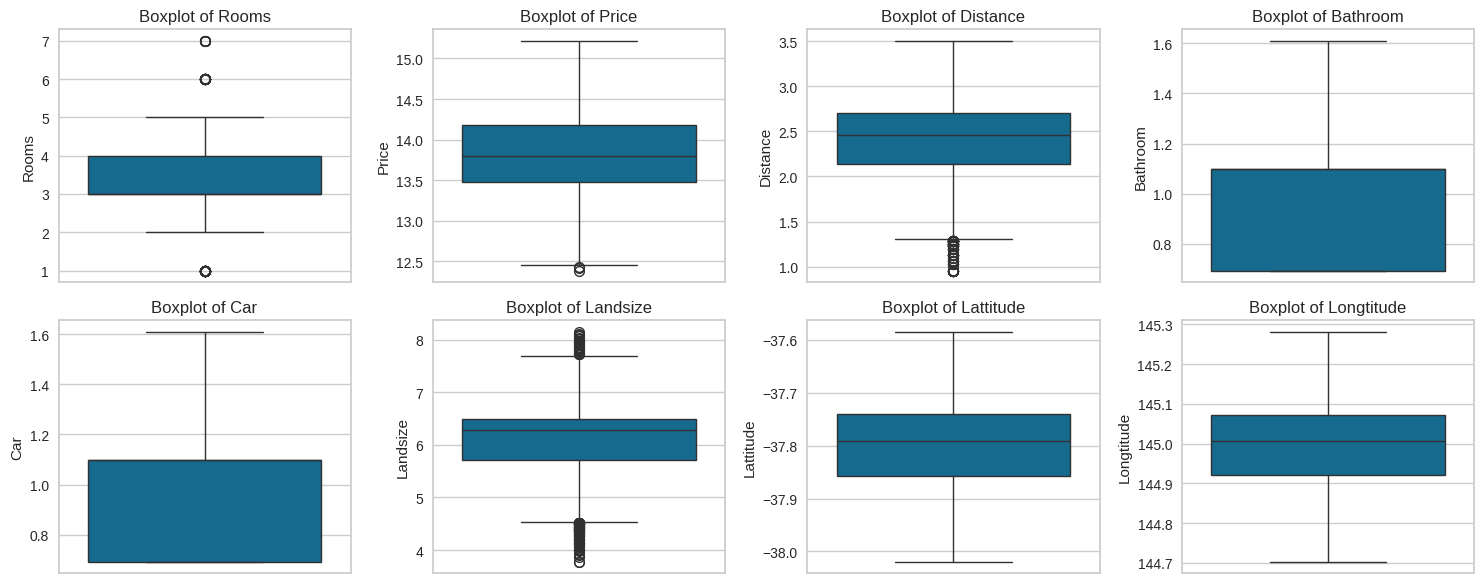

In [59]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=home_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [60]:
print("\nInfo Dataset:")
print(home_df.info())


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 6644 entries, 2 to 8885
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6644 non-null   object 
 1   Address        6644 non-null   object 
 2   Rooms          6644 non-null   int64  
 3   Type           6644 non-null   object 
 4   Price          6644 non-null   float64
 5   Method         6644 non-null   object 
 6   SellerG        6644 non-null   object 
 7   Date           6644 non-null   object 
 8   Distance       6644 non-null   float64
 9   Postcode       6644 non-null   float64
 10  Bedroom2       6644 non-null   float64
 11  Bathroom       6644 non-null   float64
 12  Car            6644 non-null   float64
 13  Landsize       6644 non-null   float64
 14  BuildingArea   6644 non-null   float64
 15  YearBuilt      6644 non-null   float64
 16  CouncilArea    6644 non-null   object 
 17  Lattitude      6644 non-null   float64
 18

## Encoding

In [61]:
categorical_cols = ['Type','Regionname']
home_df = pd.get_dummies(home_df, columns=categorical_cols, drop_first=True)

In [62]:
cols_to_encode = [
    "Regionname_Northern Metropolitan",
    "Regionname_Northern Victoria",
    "Regionname_South-Eastern Metropolitan",
    "Regionname_Southern Metropolitan",
    "Regionname_Western Metropolitan",
    "Type_t", "Type_u"
]

home_df[cols_to_encode] = home_df[cols_to_encode].astype(int)

In [63]:
home_df.sample(10)

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Lattitude,Longtitude,Propertycount,Type_t,Type_u,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan
2018,Kew,60 Childers St,3,14.220976,PI,Marshall,27/11/2016,1.887070,3101.0,3.0,...,-37.79810,145.04230,10331.0,0,0,0,0,0,1,0
5426,Deer Park,13 Cavendish Dr,3,13.230322,S,Barry,8/07/2017,2.760010,3023.0,3.0,...,-37.76545,144.76458,6388.0,0,0,0,0,0,0,1
1650,Gowanbrae,41 Balerno Cir,3,13.130334,S,Nelson,6/08/2016,2.681022,3043.0,3.0,...,-37.70900,144.89640,1071.0,0,0,0,0,0,0,1
3011,Seddon,70 Station Rd,3,13.681980,S,Jas,16/07/2016,2.028148,3011.0,3.0,...,-37.80650,144.88660,2417.0,0,0,0,0,0,0,1
1335,Essendon,124c Hoffmans Rd,3,13.487008,S,Frank,15/10/2016,2.197225,3040.0,3.0,...,-37.74180,144.89180,9264.0,1,0,0,0,0,0,1
8018,Kealba,44 Bellara Cr,4,13.321216,S,Ray,10/02/2018,2.708050,3021.0,4.0,...,-37.73027,144.81655,1202.0,0,0,0,0,0,0,1
7995,Oakleigh,22 Heath Av,4,14.190517,S,Buxton,3/02/2018,2.587764,3166.0,4.0,...,-37.90191,145.09857,3224.0,0,0,0,0,0,1,0
7401,West Footscray,702 Barkly St,3,13.688814,S,Hodges,28/10/2017,2.001480,3012.0,3.0,...,-37.79613,144.86742,5058.0,0,0,0,0,0,0,1
4994,Mount Waverley,85 Waimarie Dr,4,14.362476,S,Jellis,17/06/2017,2.721295,3149.0,4.0,...,-37.87833,145.13731,13366.0,0,0,0,0,0,0,0
7999,Yarraville,41 Francis St,2,13.534474,S,hockingstuart/Biggin,3/02/2018,1.987874,3013.0,2.0,...,-37.82183,144.89488,6543.0,0,0,0,0,0,0,1


## Normalisasi

In [64]:
scaler = MinMaxScaler()
home_df[numerical_cols] = scaler.fit_transform(home_df[numerical_cols])
home_df.sample(10)

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Lattitude,Longtitude,Propertycount,Type_t,Type_u,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan
1882,Ivanhoe,1/10 Oriel Rd,0.333333,0.378475,S,Barry,27/06/2016,0.482556,3079.0,3.0,...,0.582863,0.574434,5549.0,1,0,0,0,0,0,0
7891,Hampton East,80 Wickham Rd,0.333333,0.609905,SP,Buxton,9/12/2017,0.681994,3188.0,3.0,...,0.172845,0.568880,2356.0,0,0,0,0,0,1,0
7175,Preston,141 Albert St,0.166667,0.440827,S,hockingstuart,21/10/2017,0.503990,3072.0,2.0,...,0.650738,0.554277,14577.0,0,0,1,0,0,0,0
2713,Preston,78 Miller St,0.333333,0.531795,PI,Harcourts,17/09/2016,0.520332,3072.0,3.0,...,0.617423,0.497093,14577.0,0,0,1,0,0,0,0
3360,Templestowe Lower,16 Clauscen St,0.500000,0.591866,PI,Jellis,12/11/2016,0.681994,3107.0,4.0,...,0.586319,0.715101,5420.0,0,0,0,0,0,0,0
7158,Maribyrnong,18 Valnere St,0.666667,0.493815,PI,Biggin,21/10/2017,0.279287,3032.0,5.0,...,0.540216,0.313759,4918.0,0,0,0,0,0,0,1
4245,Kealba,7 Donnelly Ct,0.500000,0.350090,S,Ray,29/04/2017,0.712566,3021.0,4.0,...,0.652674,0.204685,1202.0,0,0,0,0,0,0,1
4135,Coburg,22/129 Harding St,0.333333,0.436139,S,Barry,13/05/2017,0.478125,3058.0,3.0,...,0.628712,0.477715,11204.0,1,0,1,0,0,0,0
6014,Taylors Hill,55 Bloomsbury Dr,0.333333,0.273376,S,Barry,22/07/2017,0.779958,3037.0,3.0,...,0.703730,0.098467,4242.0,0,0,0,0,0,0,1
5640,Hurstbridge,40 Anzac Av,0.666667,0.421240,S,Mason,12/08/2017,0.919208,3099.0,5.0,...,0.877405,0.857672,1345.0,0,0,0,1,0,0,0


## Binning dan Visualisasi Data

In [65]:
home_df['Price_Bin'] = pd.cut(home_df['Price'], bins=[0, 0.3, 0.6, 1.01],
                              labels=['Murah', 'Sedang', 'Mahal'],
                              include_lowest=True)

home_df['Landsize_Bin'] = pd.cut(home_df['Landsize'], bins=[0, 0.2, 0.5, 1.01],
                                 labels=['Kecil', 'Sedang', 'Besar'],
                                 include_lowest=True)

home_df['Distance_Bin'] = pd.cut(home_df['Distance'], bins=[0, 0.3, 0.6, 1.01],
                                 labels=['Dekat', 'Sedang', 'Jauh'],
                                 include_lowest=True)

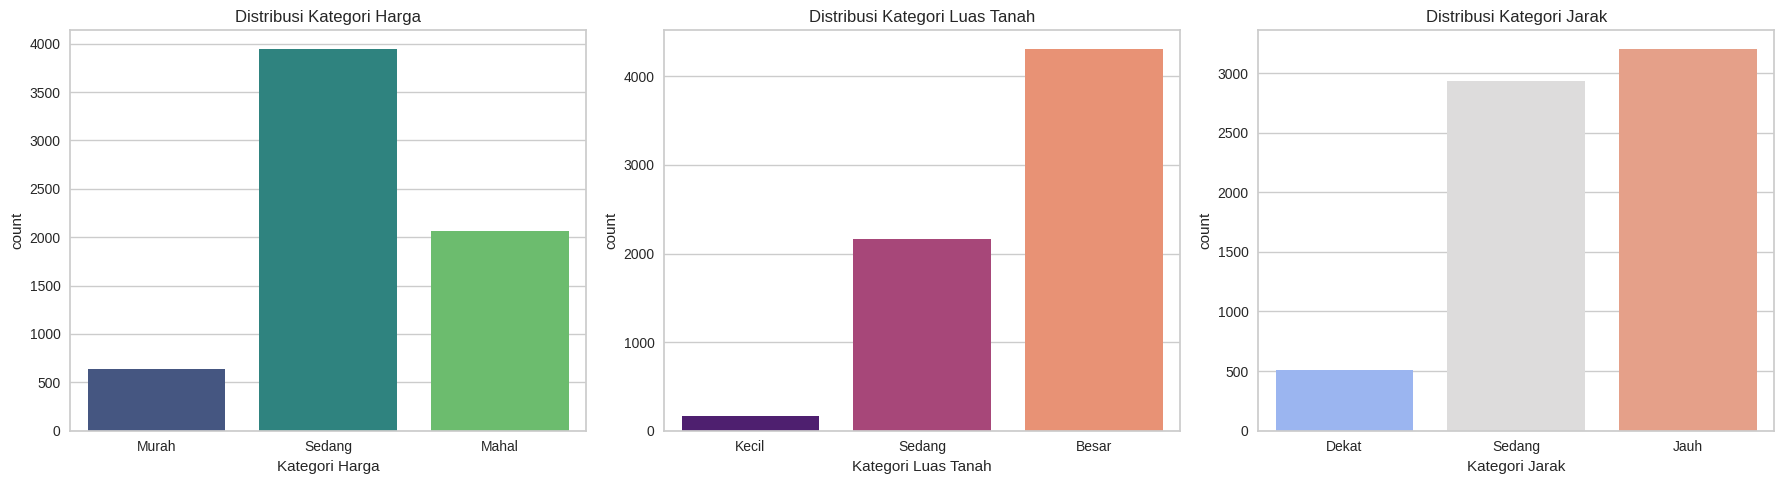

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram Price Bin
sns.countplot(data=home_df, x='Price_Bin', hue='Price_Bin', palette='viridis', legend=False, ax=axes[0])
axes[0].set_title("Distribusi Kategori Harga")
axes[0].set_xlabel("Kategori Harga")

# Histogram Landsize Bin
sns.countplot(data=home_df, x='Landsize_Bin', hue='Landsize_Bin', palette='magma', legend=False, ax=axes[1])
axes[1].set_title("Distribusi Kategori Luas Tanah")
axes[1].set_xlabel("Kategori Luas Tanah")

# Histogram Distance Bin
sns.countplot(data=home_df, x='Distance_Bin', hue='Distance_Bin', palette='coolwarm', legend=False, ax=axes[2])
axes[2].set_title("Distribusi Kategori Jarak")
axes[2].set_xlabel("Kategori Jarak")

plt.tight_layout()
plt.show()

In [67]:
home_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6644 entries, 2 to 8885
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Suburb                                 6644 non-null   object  
 1   Address                                6644 non-null   object  
 2   Rooms                                  6644 non-null   float64 
 3   Price                                  6644 non-null   float64 
 4   Method                                 6644 non-null   object  
 5   SellerG                                6644 non-null   object  
 6   Date                                   6644 non-null   object  
 7   Distance                               6644 non-null   float64 
 8   Postcode                               6644 non-null   float64 
 9   Bedroom2                               6644 non-null   float64 
 10  Bathroom                               6644 non-null   float64 
 

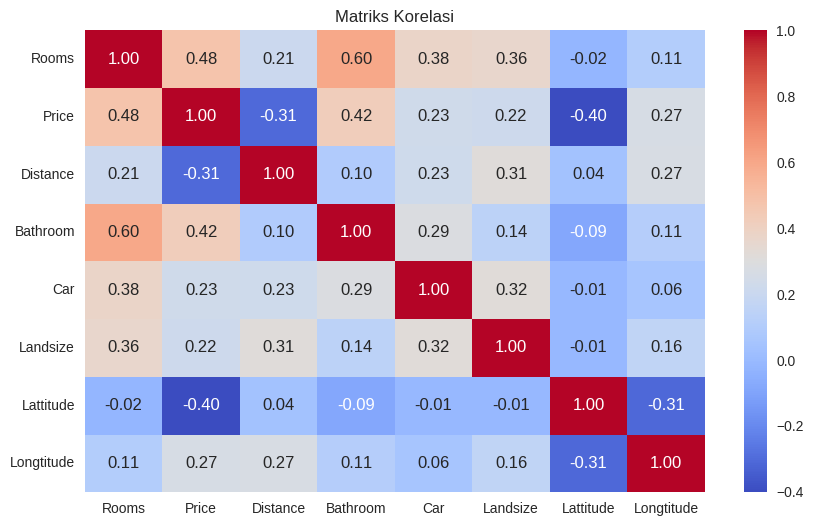

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(home_df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [69]:
from sklearn.decomposition import PCA
import numpy as np

Fitur = ['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude', 'Type_t', 'Type_u', 'Regionname_Northern Metropolitan', 'Regionname_South-Eastern Metropolitan', 'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan']
X = home_df[Fitur]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Rasio Variansi yang Dijelaskan oleh 2 Komponen PCA:", np.sum(pca.explained_variance_ratio_))

# Clustering dengan PCA
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_pca = kmeans.fit_predict(X_pca)

Rasio Variansi yang Dijelaskan oleh 2 Komponen PCA: 0.5331342582445571


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

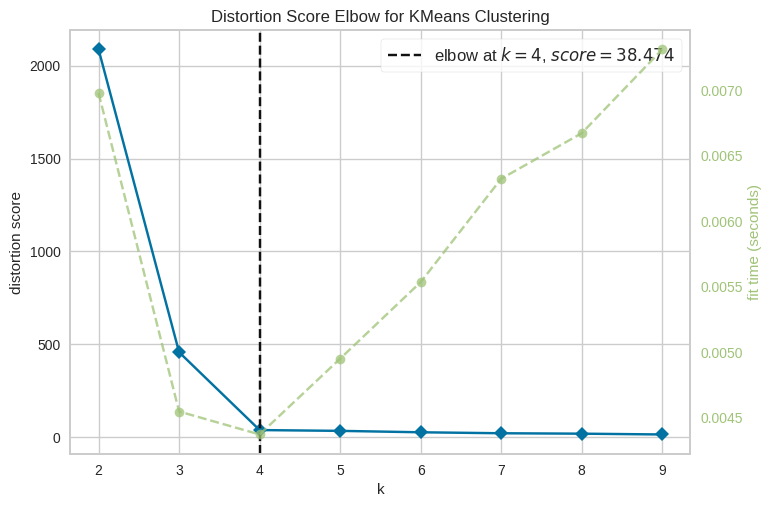

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [70]:
# Gunakan Elbow Method untuk menentukan jumlah cluster optimal
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric='distortion')
visualizer.fit(X_pca)
visualizer.show()

In [71]:
silhouette_pca = silhouette_score(X_pca, labels_pca)
print(f"Silhouette Score setelah PCA: {silhouette_pca:.4f}")

Silhouette Score setelah PCA: 0.8883


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [72]:
selector = VarianceThreshold(threshold=0.01)  # Buang fitur dengan variansi < 0.01
X_selected = selector.fit_transform(X)

# Dapatkan mask fitur yang dipilih (True berarti fitur dipilih)
selected_mask = selector.get_support()

# Ambil nama fitur yang dipilih
selected_features = X.columns[selected_mask]

print("Fitur yang dipilih:", selected_features.tolist())

Fitur yang dipilih: ['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude', 'Type_t', 'Type_u', 'Regionname_Northern Metropolitan', 'Regionname_South-Eastern Metropolitan', 'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan']


Rasio Variansi yang Dijelaskan oleh 2 Komponen PCA: 0.5331342582445571


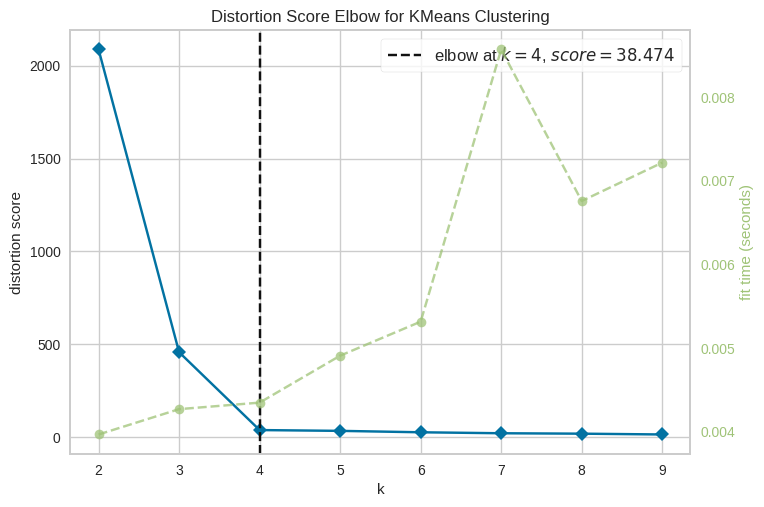

Silhouette Score setelah PCA dengan Feature Selection: 0.8883


In [73]:
pca = PCA(n_components=2)
X_pca_selected = pca.fit_transform(X_selected)

print("Rasio Variansi yang Dijelaskan oleh 2 Komponen PCA:", np.sum(pca.explained_variance_ratio_))

# Clustering dengan PCA
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_pca_selected = kmeans.fit_predict(X_pca_selected)

kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric='distortion')
visualizer.fit(X_pca_selected)
visualizer.show()

silhouette_pca_selected = silhouette_score(X_pca_selected, labels_pca_selected)
print(f"Silhouette Score setelah PCA dengan Feature Selection: {silhouette_pca_selected:.4f}")

Silhouette Score untuk k=2: 0.5393
Silhouette Score untuk k=3: 0.7910
Silhouette Score untuk k=4: 0.8883
Silhouette Score untuk k=5: 0.7830
Silhouette Score untuk k=6: 0.6491
Silhouette Score untuk k=7: 0.5920
Silhouette Score untuk k=8: 0.4807
Silhouette Score untuk k=9: 0.4640
Silhouette Score untuk k=10: 0.4539


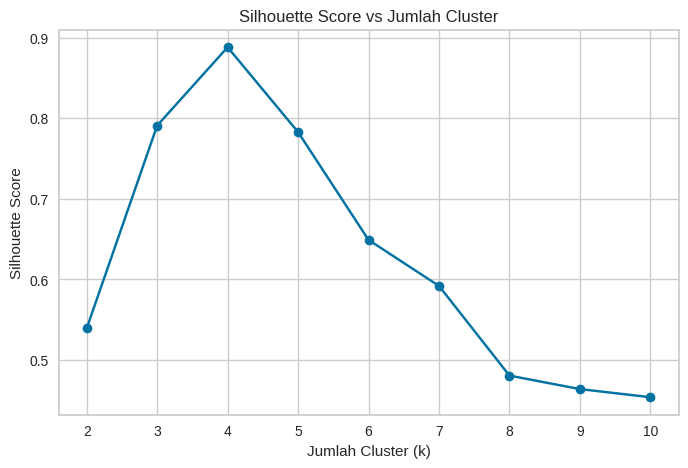

In [74]:
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(X_pca_selected)
    sil_score = silhouette_score(X_pca_selected, labels)
    silhouette_scores.append(sil_score)
    print(f"Silhouette Score untuk k={k}: {sil_score:.4f}")

# Plot hasilnya
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Jumlah Cluster")
plt.show()

In [75]:
home_df.sample(10)

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Type_t,Type_u,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Price_Bin,Landsize_Bin,Distance_Bin
4370,Reservoir,11 Mais St,0.500000,0.469291,S,hockingstuart,8/04/2017,0.606234,3073.0,4.0,...,0,0,1,0,0,0,0,Sedang,Besar,Jauh
2503,Oak Park,11 Hillcrest Rd,0.666667,0.467332,VB,Brad,30/07/2016,0.615760,3046.0,5.0,...,0,0,1,0,0,0,0,Sedang,Besar,Jauh
4359,Preston,14 West St,0.333333,0.566089,S,Barry,6/05/2017,0.520332,3072.0,3.0,...,0,0,1,0,0,0,0,Sedang,Besar,Sedang
429,Bentleigh,21 Bruce St,0.333333,0.656100,S,Buxton,28/08/2016,0.660202,3204.0,2.0,...,0,0,0,0,0,1,0,Mahal,Besar,Jauh
7455,Box Hill,37 Thames St,0.500000,0.726841,S,RT,11/11/2017,0.596470,3128.0,4.0,...,0,0,0,0,0,0,0,Mahal,Besar,Sedang
629,Brighton East,11 Billson St,0.333333,0.623551,VB,Marshall,7/05/2016,0.589824,3187.0,3.0,...,0,0,0,0,0,1,0,Mahal,Besar,Sedang
8789,Mentone,13 Logan Ct,0.500000,0.555534,PI,Buxton,24/02/2018,0.819205,3194.0,4.0,...,0,0,0,0,1,0,0,Sedang,Besar,Jauh
768,Brunswick West,121 Pearson St,0.333333,0.597348,PI,Jellis,12/11/2016,0.382742,3055.0,3.0,...,0,0,1,0,0,0,0,Sedang,Sedang,Sedang
8776,Kew,118 Walpole St,0.833333,0.881643,SP,Marshall,24/02/2018,0.353243,3101.0,6.0,...,0,0,0,0,0,1,0,Mahal,Besar,Sedang
7831,Attwood,12 Chandos Pl,0.500000,0.434418,VB,Barry,9/12/2017,0.747708,3049.0,4.0,...,0,0,1,0,0,0,0,Sedang,Besar,Jauh


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

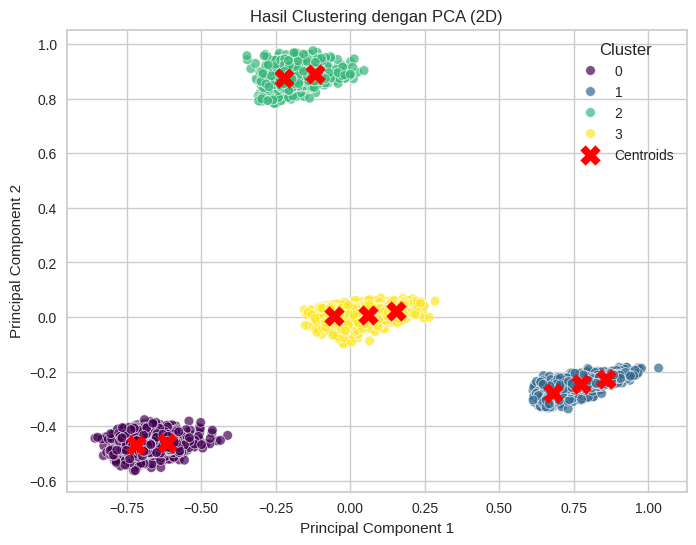

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot hasil PCA dalam 2D dengan warna sesuai label clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_pca, palette='viridis', alpha=0.7)

# Tambahkan centroids K-Means (opsional)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Hasil Clustering dengan PCA (2D)")
plt.legend(title="Cluster")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [77]:
encode_feature = ['Type_t','Type_u','Regionname_Northern Metropolitan','Regionname_Northern Victoria','Regionname_South-Eastern Metropolitan','Regionname_Southern Metropolitan','Regionname_Western Metropolitan']
home_df['Type'] = home_df[['Type_t', 'Type_u']].idxmax(axis=1)
home_df['Regionname'] = home_df[['Regionname_Northern Metropolitan',
                                 'Regionname_Northern Victoria',
                                 'Regionname_South-Eastern Metropolitan',
                                 'Regionname_Southern Metropolitan',
                                 'Regionname_Western Metropolitan']].idxmax(axis=1)

# Membersihkan nama kolom agar hanya menyisakan nilai kategorikal asli
home_df['Type'] = home_df['Type'].str.replace('Type_', '', regex=False)
home_df['Regionname'] = home_df['Regionname'].str.replace('Regionname_', '', regex=False)

# Menghapus kolom one-hot encoding jika tidak diperlukan lagi
home_df.drop(columns=encode_feature, inplace=True)

# Menampilkan hasil
home_df.head()

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Propertycount,Price_Bin,Landsize_Bin,Distance_Bin,Type,Regionname
2,Abbotsford,55a Park St,0.500000,0.670763,VB,Nelson,4/06/2016,0.116567,3067.0,3.0,...,2014.0,Yarra City Council,0.488169,0.502976,4019.0,Mahal,Sedang,Dekat,t,Northern Metropolitan
4,Abbotsford,98 Charles St,0.166667,0.678630,S,Nelson,8/10/2016,0.116567,3067.0,2.0,...,1890.0,Yarra City Council,0.490934,0.505225,4019.0,Mahal,Sedang,Dekat,t,Northern Metropolitan
5,Abbotsford,10 Valiant St,0.166667,0.537317,S,Biggin,8/10/2016,0.116567,3067.0,3.0,...,1900.0,Yarra City Council,0.502454,0.511281,4019.0,Sedang,Sedang,Dekat,t,Northern Metropolitan
6,Abbotsford,40 Nicholson St,0.333333,0.610692,VB,Nelson,12/11/2016,0.116567,3067.0,3.0,...,2005.0,Yarra City Council,0.485174,0.506955,4019.0,Mahal,Sedang,Dekat,t,Northern Metropolitan
8,Abbotsford,16 William St,0.166667,0.600058,S,Jellis,15/10/2016,0.116567,3067.0,2.0,...,1890.0,Yarra City Council,0.484022,0.509032,4019.0,Mahal,Sedang,Dekat,t,Northern Metropolitan


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [78]:
# List kolom yang ingin dikembalikan
columns = ["Rooms", "Price", "Distance", "Bathroom", "Car", "Landsize", "Lattitude", "Longtitude"]

# Min dan Max dari statistik deskriptif
X_min = np.array([1, 8.500000e+04, 0, 0, 0, 0, -38.19043, 144.42379])  # min values
X_max = np.array([12, 1.120000e+07, 48.1, 9, 18, 433014, -37.39946, 145.52635])  # max values

# Buat Scaler dengan rentang min-max yang sesuai
scaler = MinMaxScaler(feature_range=(0, 1))  # Sesuai skala normalisasi awal
scaler.fit(np.vstack((X_min, X_max)))  # Fit scaler dengan min & max

# Inverse transform untuk mengembalikan data ke skala asli
home_df[columns] = scaler.inverse_transform(home_df[columns])

# Cek hasilnya
home_df.head()

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Propertycount,Price_Bin,Landsize_Bin,Distance_Bin,Type,Regionname
2,Abbotsford,55a Park St,6.500000,7.540533e+06,VB,Nelson,4/06/2016,5.606879,3067.0,3.0,...,2014.0,Yarra City Council,-37.804303,144.978351,4019.0,Mahal,Sedang,Dekat,t,Northern Metropolitan
4,Abbotsford,98 Charles St,2.833333,7.627976e+06,S,Nelson,8/10/2016,5.606879,3067.0,2.0,...,1890.0,Yarra City Council,-37.802116,144.980831,4019.0,Mahal,Sedang,Dekat,t,Northern Metropolitan
5,Abbotsford,10 Valiant St,2.833333,6.057283e+06,S,Biggin,8/10/2016,5.606879,3067.0,3.0,...,1900.0,Yarra City Council,-37.793004,144.987508,4019.0,Sedang,Sedang,Dekat,t,Northern Metropolitan
6,Abbotsford,40 Nicholson St,4.666667,6.872842e+06,VB,Nelson,12/11/2016,5.606879,3067.0,3.0,...,2005.0,Yarra City Council,-37.806672,144.982739,4019.0,Mahal,Sedang,Dekat,t,Northern Metropolitan
8,Abbotsford,16 William St,2.833333,6.754640e+06,S,Jellis,15/10/2016,5.606879,3067.0,2.0,...,1890.0,Yarra City Council,-37.807583,144.985028,4019.0,Mahal,Sedang,Dekat,t,Northern Metropolitan


In [79]:
home_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6644 entries, 2 to 8885
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         6644 non-null   object  
 1   Address        6644 non-null   object  
 2   Rooms          6644 non-null   float64 
 3   Price          6644 non-null   float64 
 4   Method         6644 non-null   object  
 5   SellerG        6644 non-null   object  
 6   Date           6644 non-null   object  
 7   Distance       6644 non-null   float64 
 8   Postcode       6644 non-null   float64 
 9   Bedroom2       6644 non-null   float64 
 10  Bathroom       6644 non-null   float64 
 11  Car            6644 non-null   float64 
 12  Landsize       6644 non-null   float64 
 13  BuildingArea   6644 non-null   float64 
 14  YearBuilt      6644 non-null   float64 
 15  CouncilArea    6644 non-null   object  
 16  Lattitude      6644 non-null   float64 
 17  Longtitude     6644 non-null   float64

In [80]:
print("\nStatistik Deskriptif:")
print(home_df.describe())


Statistik Deskriptif:
             Rooms         Price     Distance     Postcode     Bedroom2  \
count  6644.000000  6.644000e+03  6644.000000  6644.000000  6644.000000   
mean      5.122241  5.802236e+06    27.137964  3104.199729     3.222607   
std       1.590338  1.923403e+06     8.504340    99.371033     0.867373   
min       1.000000  8.500000e+04     0.000000  3000.000000     0.000000   
25%       4.666667  4.375071e+06    22.343551  3044.000000     3.000000   
50%       4.666667  5.621069e+06    28.370517  3081.000000     3.000000   
75%       6.500000  7.124426e+06    32.930926  3146.000000     4.000000   
max      12.000000  1.120000e+07    48.100000  3803.000000     7.000000   

          Bathroom          Car       Landsize  BuildingArea    YearBuilt  \
count  6644.000000  6644.000000    6644.000000   6644.000000  6644.000000   
mean      2.649847     5.962612  228026.853348    158.968742  1965.484497   
std       2.452346     5.056060   61953.890431     87.673045    36.757

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [81]:
numeric_columns = home_df.select_dtypes(include=['number']).columns
home_df["Cluster"] = labels_pca
cluster_summary = home_df.groupby("Cluster")[numeric_columns].mean()

print(cluster_summary)

            Rooms         Price   Distance     Postcode  Bedroom2  Bathroom  \
Cluster                                                                       
0        4.776369  4.942222e+06  25.173088  3092.162272  3.039047  1.976088   
1        5.230840  7.185591e+06  25.719644  3156.652855  3.268823  3.140592   
2        5.123550  5.110369e+06  26.259896  3029.230234  3.220746  2.564505   
3        5.540468  5.849113e+06  34.394992  3138.785971  3.468525  3.092646   

              Car       Landsize  BuildingArea    YearBuilt  Lattitude  \
Cluster                                                                  
0        5.242428  213720.112662    137.013372  1964.694726 -37.654009   
1        6.109077  232995.349971    176.239771  1957.823143 -37.923894   
2        6.037399  222998.125302    156.201866  1969.982290 -37.752953   
3        6.872781  251705.501598    171.100985  1974.125000 -37.836857   

         Longtitude  Propertycount  
Cluster                             
0     

# **Analisis Karakteristik Cluster dari Model K-Means**

Clustering ini dilakukan dengan menggunakan beberapa fitur yang mencakup jumlah kamar, harga, jarak dari CBD, jumlah kamar mandi, jumlah carspot, ukuran tanah, latitude, longitude, tipe properti, serta region tempat properti berada. Berikut adalah analisis untuk setiap cluster yang terbentuk berdasarkan data yang diberikan.

### Cluster 0: *Suburban Affordable Homes*
- **Rata-rata jumlah kamar:** 4.78
- **Rata-rata harga properti:** 4.94 juta AUD
- **Rata-rata jarak dari CBD:** 25.17 km
- **Rata-rata jumlah kamar mandi:** 1.98
- **Rata-rata jumlah garasi:** 5.24
- **Rata-rata luas tanah:** 213,720 m²
- **Rata-rata tahun pembangunan:** 1964
- **Rata-rata latitude:** -37.65
- **Rata-rata longitude:** 144.96
- **Rata-rata jumlah properti di sekitar:** 9316

**Analisis:** Cluster ini berisi properti dengan harga terjangkau dan ukuran tanah yang cukup besar, dengan properti yang lebih tua dan terletak di kawasan suburban yang berkembang. Tipe properti ini kemungkinan besar berupa rumah keluarga sederhana atau tradisional yang cocok untuk mereka yang mencari tempat tinggal di luar pusat kota dengan fasilitas dasar yang cukup.

### Cluster 1: *Modern Suburban Homes*
- **Rata-rata jumlah kamar:** 5.23
- **Rata-rata harga properti:** 7.19 juta AUD
- **Rata-rata jarak dari CBD:** 25.72 km
- **Rata-rata jumlah kamar mandi:** 3.14
- **Rata-rata jumlah garasi:** 6.11
- **Rata-rata luas tanah:** 232,995 m²
- **Rata-rata tahun pembangunan:** 1957
- **Rata-rata latitude:** -37.92
- **Rata-rata longitude:** 145.08
- **Rata-rata jumlah properti di sekitar:** 7145

**Analisis:** Cluster ini menunjukkan properti dengan harga lebih tinggi, ukuran tanah lebih besar, dan fasilitas lebih lengkap seperti lebih banyak kamar dan garasi. Properti ini lebih modern dibandingkan cluster lainnya dan berlokasi di kawasan suburban yang relatif lebih berkembang. Cluster ini mungkin berisi rumah keluarga besar yang mencari ruang lebih luas, namun tidak terlalu jauh dari pusat kota.

### Cluster 2: *Affordable Family Homes*
- **Rata-rata jumlah kamar:** 5.12
- **Rata-rata harga properti:** 5.11 juta AUD
- **Rata-rata jarak dari CBD:** 26.26 km
- **Rata-rata jumlah kamar mandi:** 2.56
- **Rata-rata jumlah garasi:** 6.04
- **Rata-rata luas tanah:** 222,998 m²
- **Rata-rata tahun pembangunan:** 1970
- **Rata-rata latitude:** -37.75
- **Rata-rata longitude:** 144.73
- **Rata-rata jumlah properti di sekitar:** 5306

**Analisis:** Cluster ini berisi properti dengan harga yang sedang dan ukuran tanah besar. Properti di cluster ini juga lebih tua, dengan rata-rata tahun pembangunan yang lebih lama. Meskipun jaraknya lebih jauh dari CBD, properti ini tetap menawarkan ruang yang cukup besar untuk keluarga. Ini mungkin mencakup properti yang lebih terjangkau namun tetap menarik bagi keluarga yang membutuhkan ruang lebih.

### Cluster 3: *Premium Suburban Estates*
- **Rata-rata jumlah kamar:** 5.54
- **Rata-rata harga properti:** 5.85 juta AUD
- **Rata-rata jarak dari CBD:** 34.39 km
- **Rata-rata jumlah kamar mandi:** 3.09
- **Rata-rata jumlah garasi:** 6.87
- **Rata-rata luas tanah:** 251,705 m²
- **Rata-rata tahun pembangunan:** 1974
- **Rata-rata latitude:** -37.84
- **Rata-rata longitude:** 145.25
- **Rata-rata jumlah properti di sekitar:** 6037

**Analisis:** Cluster ini berisi properti premium dengan harga lebih tinggi dan ukuran tanah terbesar. Meskipun terletak lebih jauh dari CBD, properti di cluster ini memberikan ruang yang sangat luas, cocok untuk keluarga yang mencari ketenangan dan lebih banyak ruang. Cluster ini mencakup properti yang lebih besar, dengan banyak fasilitas dan kemungkinan besar merupakan kawasan perumahan premium atau estate yang lebih eksklusif.

### Kesimpulan
- **Cluster 0: Suburban Affordable Homes** - Properti terjangkau di kawasan suburban dengan ukuran tanah besar dan fasilitas dasar.
- **Cluster 1: Modern Suburban Homes** - Properti modern dengan harga lebih tinggi dan fasilitas lengkap di kawasan suburban yang berkembang.
- **Cluster 2: Affordable Family Homes** - Properti dengan harga sedang dan ruang yang cukup besar untuk keluarga, meskipun lebih jauh dari CBD.
- **Cluster 3: Premium Suburban Estates** - Properti premium dengan ukuran tanah terbesar dan harga tertinggi, lebih jauh dari CBD namun menawarkan ruang lebih dan fasilitas lengkap.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [82]:
home_df.to_csv('Dataset_clustering.csv', index=False)